# 4 MODEL

In [1]:
import os

import numpy as np
import torch
import torch.nn as nn
import pandas as pd
from sklearn.preprocessing import StandardScaler

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import itertools
from nltk.tokenize import sent_tokenize
import re
import textstat
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

import string
from sklearn.preprocessing import FunctionTransformer

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = 'data/out.csv'
out_data = pd.read_csv(path)

In [3]:
out_data.head()

,Unnamed: 0,star_rating,vine,verified_purchase,review_date,review,vote_ratio,helpfulness,sentence_count,word_count,ARI,words,words_text
0,414,1,0,1,2015-08-31,Cannot be used with headphones If you plan to ...,0.074074,0,4,32,7.5,"['Cannot', 'used', 'headphones', 'plan', 'use'...",Cannot used headphones plan use iPad mini head...
1,939,1,0,1,2015-08-31,Shorted out after 2 days use Worked for 2 days...,0.050505,0,2,25,11.7,"['Shorted', 'days', 'use', 'Worked', 'days', '...",Shorted days use Worked days center phone plug...
2,1112,1,0,0,2015-08-31,Same performance as a $5 cable I've never seen...,0.633803,0,2,16,6.8,"['Same', 'performance', 'cable', 'never', 'see...",Same performance cable never seen many fake st...
3,1399,3,0,1,2015-08-31,1) It isn't sturdy enough to be used on a keyr...,0.857143,1,5,33,4.1,"['sturdy', 'enough', 'used', 'keyring', 'works...",sturdy enough used keyring works drawbacks stu...
4,1843,3,0,1,2015-08-31,Fan does good job cooling. The fan itself work...,0.777778,0,3,20,4.3,"['Fan', 'good', 'job', 'cooling', 'The', 'fan'...",Fan good job cooling The fan works fine honest...


In [4]:
# split data
total_len = len(out_data)
val_len = round(0.1 * total_len)


y = out_data['helpfulness']
X = out_data[['star_rating', 'vine', 'verified_purchase', 'words_text', 'sentence_count', 'word_count', 'ARI']]
# X = out_data[['star_rating', 'vine', 'verified_purchase', 'review', 'sentence_count', 'word_count', 'ARI',
#        'words', 'words_text']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=val_len,
                                                    random_state=123)

In [5]:
# 'star_rating', 'vine', 'verified_purchase', 'sentence_count', 'word_count', 'ARI'
numeric_features = ['star_rating', 'vine', 'verified_purchase', 'sentence_count', 'word_count', 'ARI']

numeric_transformer = Pipeline([
    ('scaler', StandardScaler())
])

In [6]:
stop_list = stopwords.words('english')
stop_list += list(string.punctuation)
stop_list += ['br', '.<', '..', '...', '``', "''", '--']

# 'review'
categorical_transformer = Pipeline([
    ('vectorizer', CountVectorizer(max_features=5000))
])

categorical_features = 'words_text'

In [7]:
feature_transformers = [
    ('numeric', numeric_transformer, numeric_features),
    ('categorical', categorical_transformer, categorical_features)
]



feature_preprocessor = ColumnTransformer(transformers=feature_transformers,remainder='drop')

# Random Forest

In [8]:
fp_rf = Pipeline([('feature_preprocessor',feature_preprocessor),
                        ('forest', RandomForestClassifier(n_estimators=100,
                                                          n_jobs=-1))])

fp_rf.fit(X_train, y_train)

Pipeline(steps=[('feature_preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['star_rating', 'vine',
                                                   'verified_purchase',
                                                   'sentence_count',
                                                   'word_count', 'ARI']),
                                                 ('categorical',
                                                  Pipeline(steps=[('vectorizer',
                                                                   CountVectorizer(max_features=5000))]),
                                                  'words_text')])),
                ('forest', RandomForestClassifier(n_jobs=-1))])

In [9]:
fp_rf.score(X_test,y_test)

0.8234990981705745

In [10]:
y_pred_test = fp_rf.predict(X_test)
print('Validation accuracy:', accuracy_score(y_test, y_pred_test))

Validation accuracy: 0.8234990981705745


In [11]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.77      0.38      0.51       933
           1       0.83      0.96      0.89      2948

    accuracy                           0.82      3881
   macro avg       0.80      0.67      0.70      3881
weighted avg       0.82      0.82      0.80      3881



[Text(0.5, 23.52222222222222, 'Predicted'),
 Text(113.9222222222222, 0.5, 'Actual')]

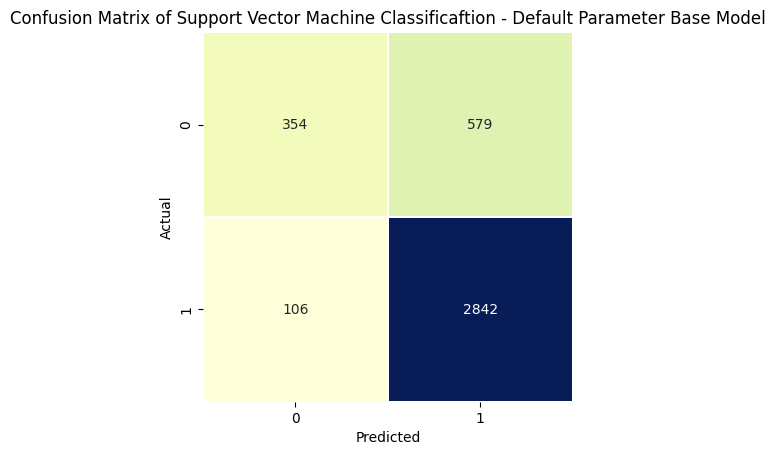

In [12]:
cm = confusion_matrix(y_test, y_pred_test)
# Plotting the Confusion Matrix for easy understanding
ax = plt.axes()
sns.heatmap(cm, 
            annot=True, # Show values of each cell in the heatmap
            fmt="1.0f", # or "d"
            cmap="YlGnBu", # color range of the heatmap
            linecolor='white', # plot cell border
            linewidths=0.1, # width of border
            cbar=False, # hide range bar
            square=True) # Make the Confusion Matrix Look like a square
ax.set_title('Confusion Matrix of Support Vector Machine Classificaftion - Default Parameter Base Model')
ax.set(xlabel='Predicted', ylabel='Actual') # Change X and Y axis labe

# SVM

In [13]:
from sklearn.svm import SVC

In [ ]:
fp_svm = Pipeline([('feature_preprocessor',feature_preprocessor),
                        ('svm', SVC())])
fp_svm.fit(X_train, y_train)

In [ ]:
y_pred_test = fp_svm.predict(X_test)
print('Validation accuracy:', accuracy_score(y_test, y_pred_test))

In [ ]:
print(classification_report(y_test, y_pred_test))

In [ ]:
fp_svm.score(X_test,y_test)